In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [3]:
random_seed = 0
x_length = 5
maximum_markov_chain_length = 50

# Notes
    - seems like the "better" methods don't explore enough at the start
    - step size control makes big difference (clipp and initialisation)
    - fancy temperature annealing doesn't help - need to read literature (maybe coeff of variation type thing would be better?)

# With Cholesky

In [4]:
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
rana_2d_chol = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Cholesky", step_size_initialisation_fraction_of_range = 0.1,
                             maximum_archive_length=100,
                                   archive_minimum_acceptable_dissimilarity=60, maximum_markov_chain_length=maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")

archive_x_chol = np.array([x_archive for x_archive, f_archive in rana_2d_chol.archive])
archive_f_chol = np.array([f_archive for x_archive, f_archive in rana_2d_chol.archive])

x_result = [417.7931808  417.79310387 417.79308322 417.79305526 417.79311151] 
 objective_result = -1667.3118751367615 
 number of function evaluations = 10017


# With diagonal thing

In [5]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max   #  annealing_schedule = "adaptive_cooling", 
rana_2d_diag = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Diagonal", step_size_initialisation_fraction_of_range = 0.1,
                             maximum_archive_length=100,
                                   archive_minimum_acceptable_dissimilarity=60, maximum_markov_chain_length=maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
# annealing_schedule = "adaptive_cooling", 
x_result_diag, objective_result_diag = rana_2d_diag.run()
print(f"x_result = {x_result_diag} \n objective_result = {objective_result_diag} \n "
      f"number of function evaluations = {rana_2d_diag.objective_function_evaluation_count}")

archive_x_diag = np.array([x_archive for x_archive, f_archive in rana_2d_diag.archive])
archive_f_diag = np.array([f_archive for x_archive, f_archive in rana_2d_diag.archive])

x_result = [-471.01134544  455.94677474 -419.75450988 -499.99999911 -499.05256936] 
 objective_result = -1899.1736958645247 
 number of function evaluations = 10011


# Simple

In [6]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                             maximum_archive_length=100,
                                   archive_minimum_acceptable_dissimilarity=60, maximum_markov_chain_length=maximum_markov_chain_length,
                                   maximum_function_evaluations=10000,  step_size_initialisation_fraction_of_range = 0.1)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

archive_x = np.array([x_archive for x_archive, f_archive in rana_2d.archive])
archive_f = np.array([f_archive for x_archive, f_archive in rana_2d.archive])

x_result = [ 467.4317108  -425.54199802 -500.         -500.          480.91434542] 
 objective_result = -1814.1043637740167 
 number of function evaluations = 10019


D:\Documents\Work\2020\Cambridge MLMI\MLMI\Practical Optimisation\Assignment 2\SimulatedAnealing.py:112: RuntimeWarning: overflow encountered in exp
  probability_of_accept = np.exp(-delta_objective / self.temperature)


# Reults

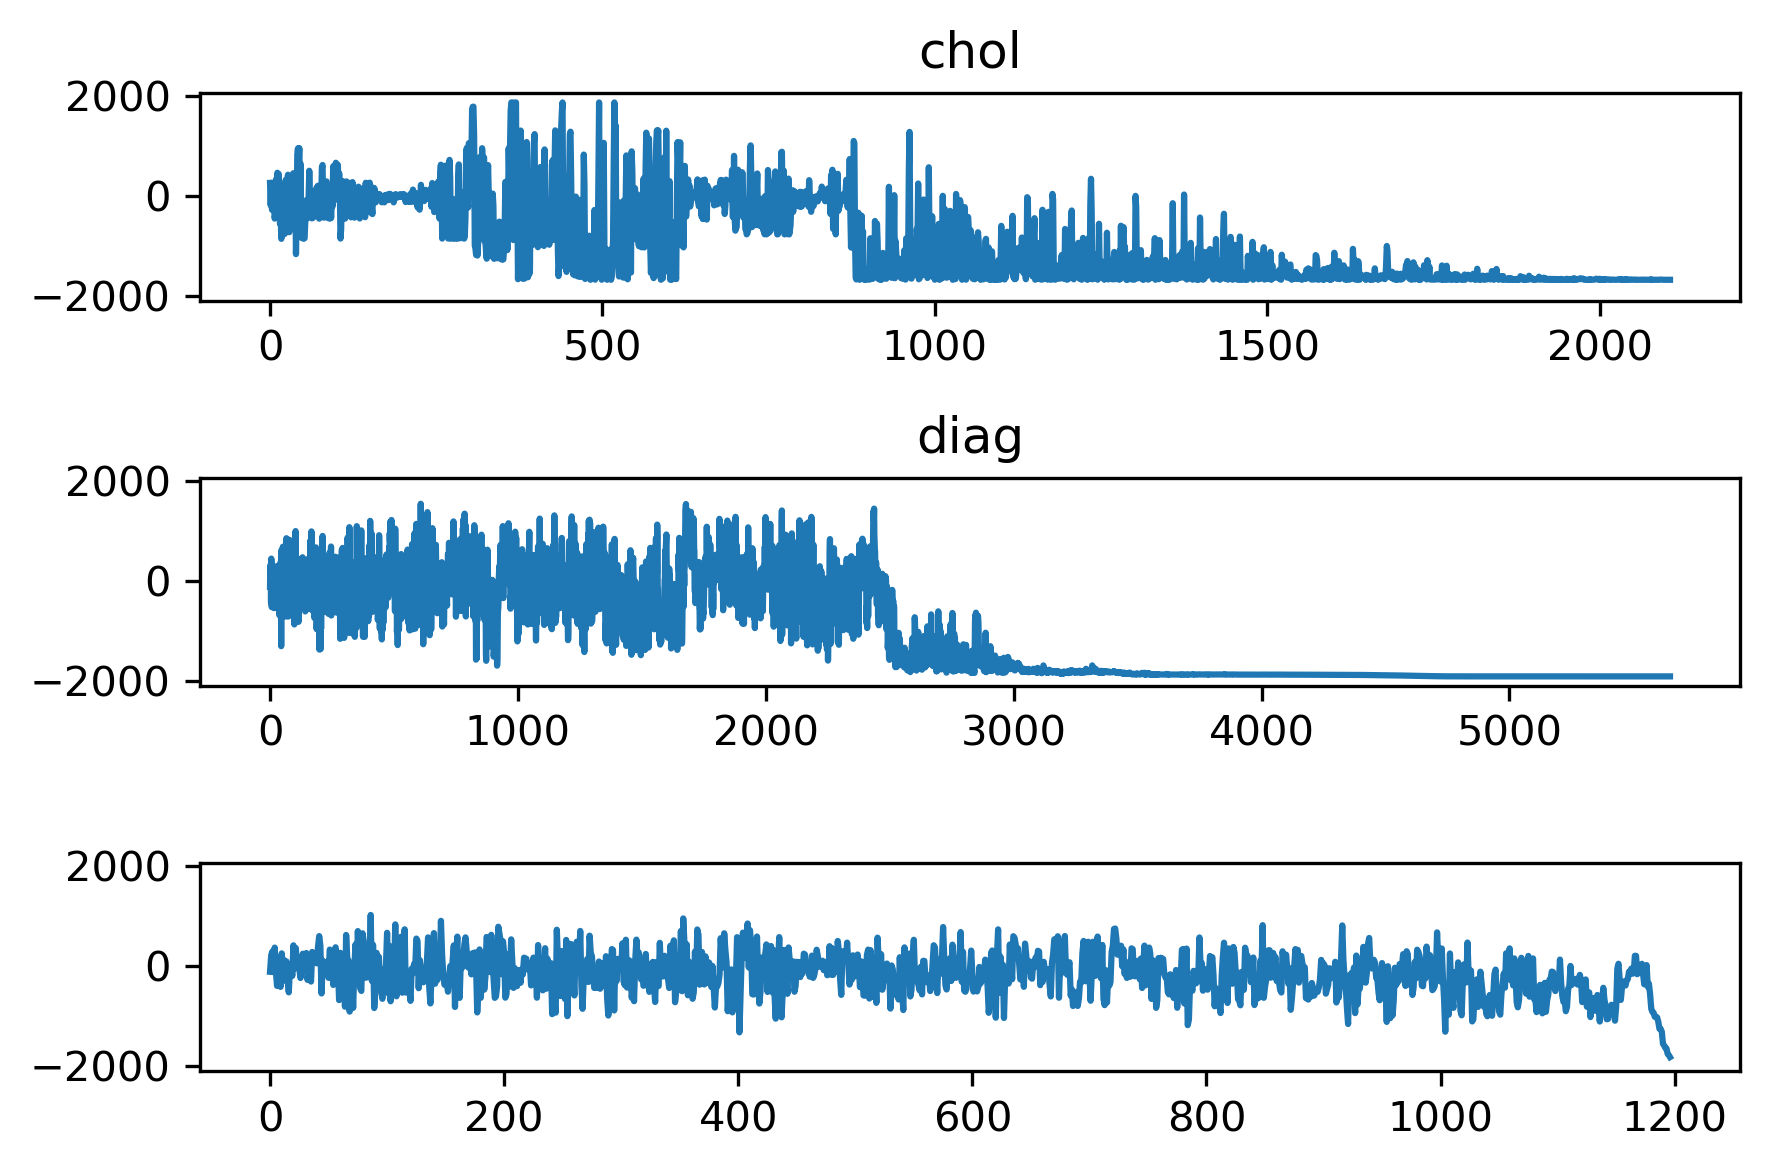

In [7]:
fig, axs = plt.subplots(3, sharey=True)
axs[0].plot(rana_2d_chol.objective_history, label="chol")
axs[1].plot(rana_2d_diag.objective_history, label="diag")
axs[2].plot(rana_2d.objective_history, label="simple")
axs[0].set_title("chol")
axs[1].set_title("diag")
plt.tight_layout()

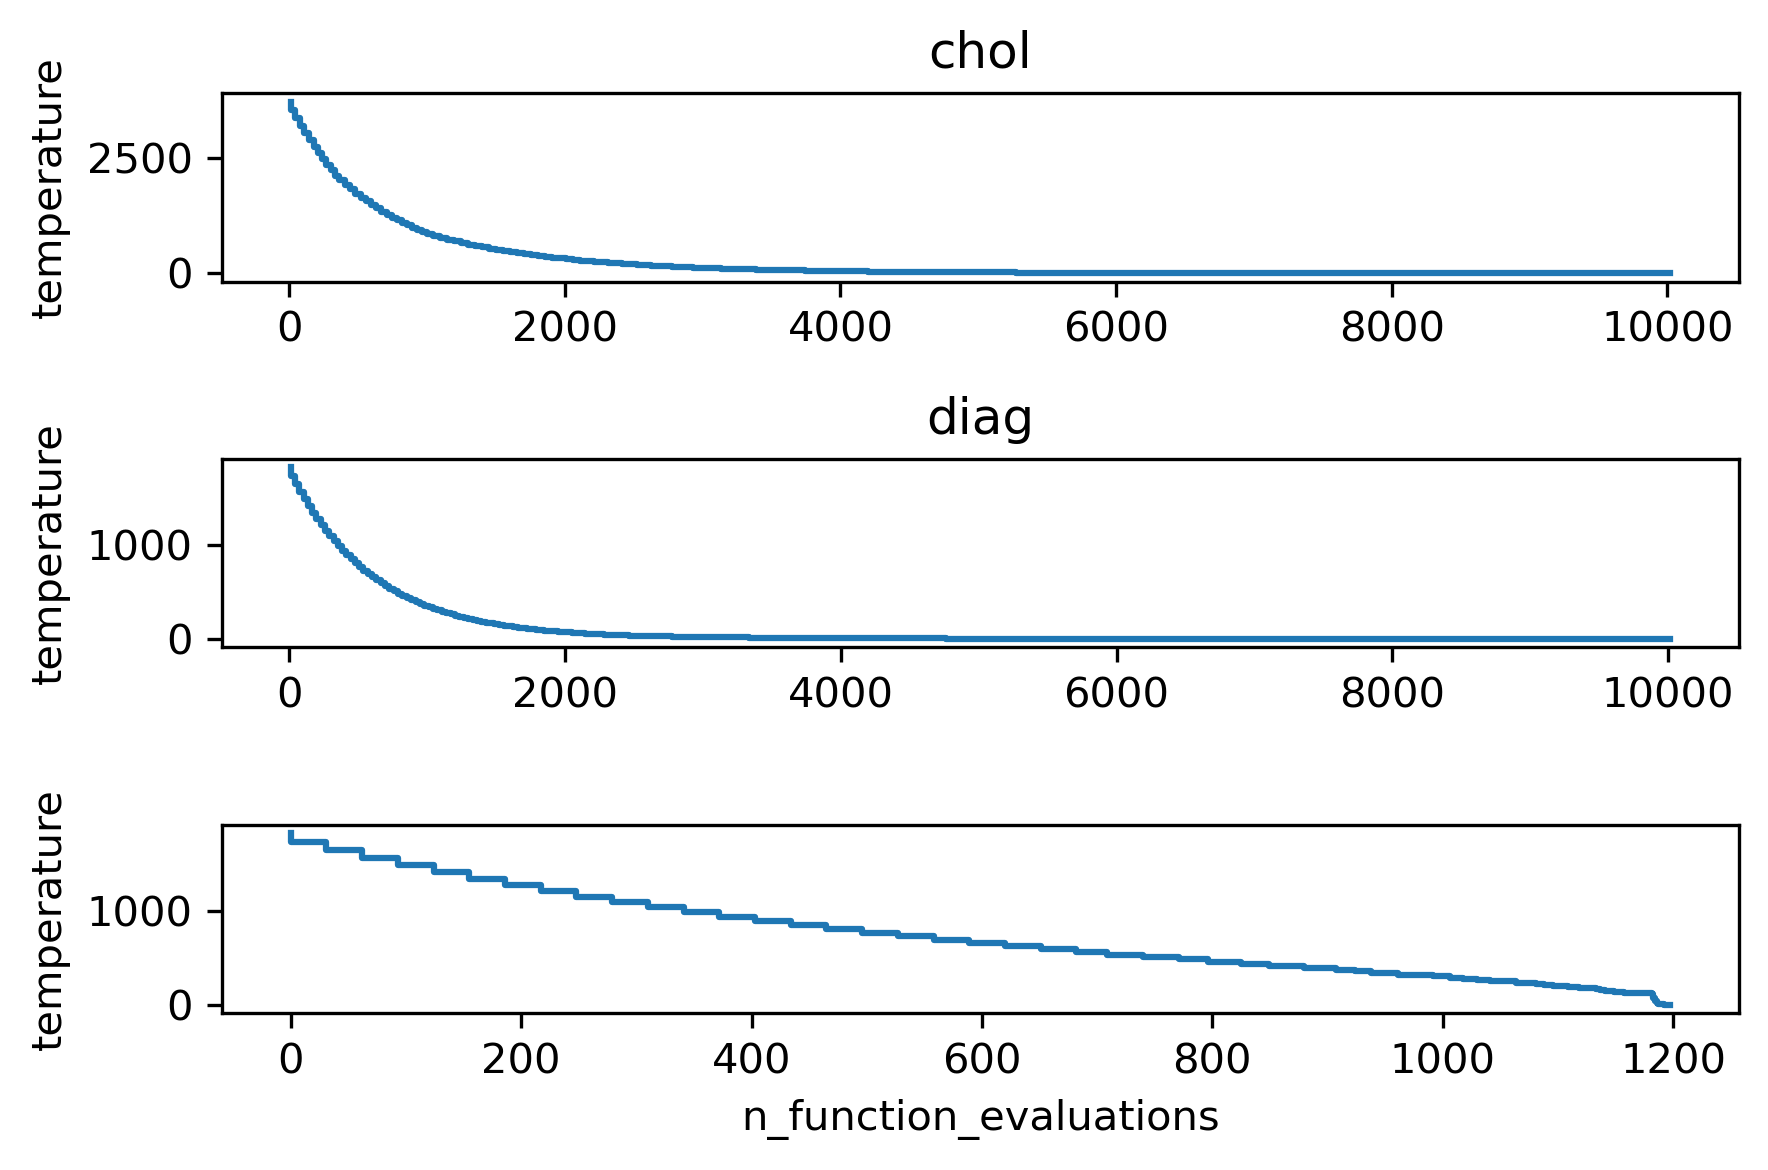

In [8]:
# temperature history
fig, axs = plt.subplots(3)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
axs[0].step(temp_history_chol[:, 2], temp_history_chol[:, 0], label="chol")
temp_history_diag = np.array(rana_2d_diag.temperature_history)
axs[1].step(temp_history_diag[:, 2], temp_history_diag[:, 0], label="diag")
temp_history = np.array(rana_2d.temperature_history)
axs[2].step(temp_history[:, 1], temp_history[:, 0], label="simple")


axs[0].set_title("chol")
axs[1].set_title("diag")
axs[0].set_ylabel("temperature")
axs[1].set_ylabel("temperature")
axs[2].set_ylabel("temperature")
axs[2].set_xlabel("n_function_evaluations")
plt.tight_layout()

Text(112.91666666666667, 0.5, 'probability')

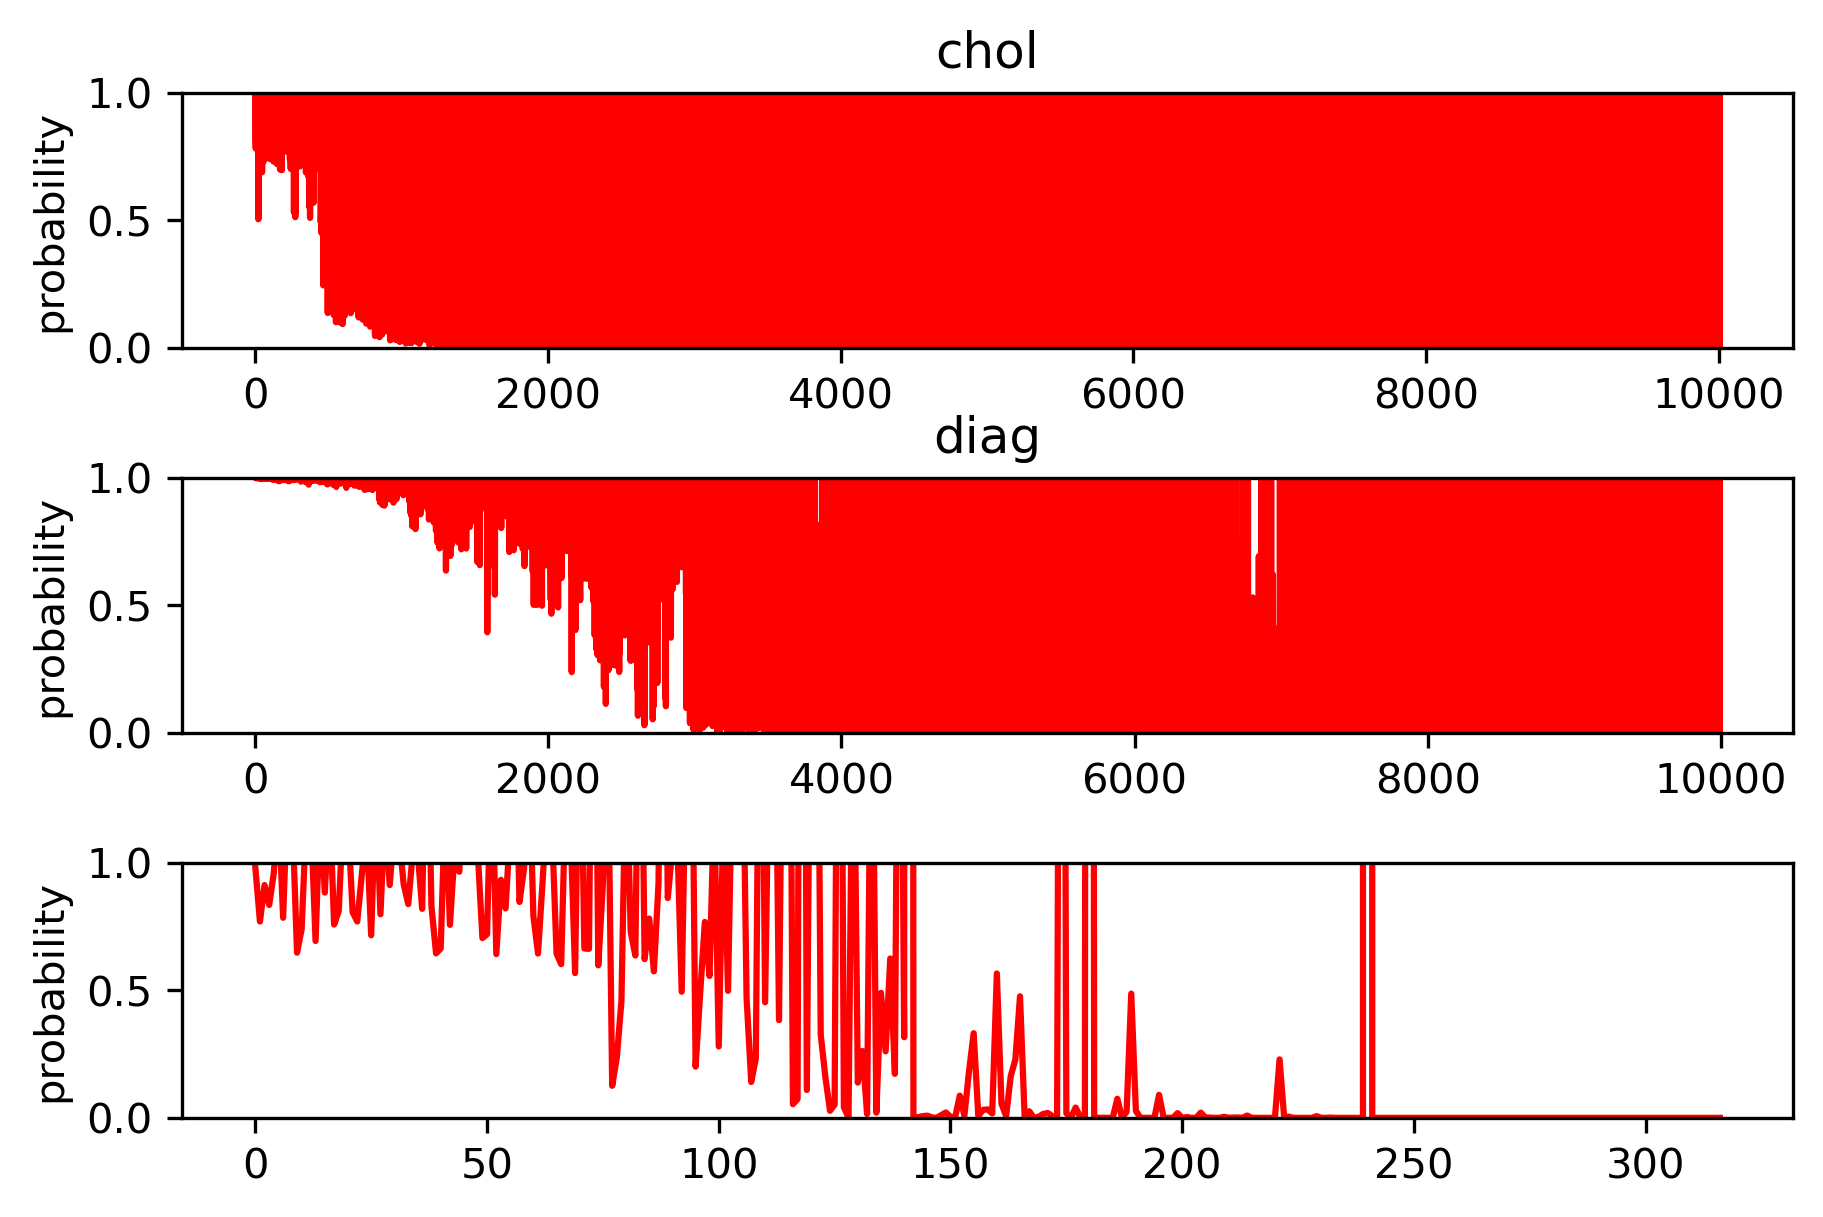

In [24]:
# probability of acceptence
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.probability_of_acceptance_history, "r", label="chol")
axs[0].set_ylim(0, 1)
axs[1].plot(rana_2d_diag.probability_of_acceptance_history, "r", label="diag")
axs[1].set_ylim(0, 1)
axs[2].plot(rana_2d.probability_of_acceptance_history, "r", label="simple")
axs[2].set_ylim(0, 1)
plt.tight_layout()

axs[0].set_title("chol")
axs[1].set_title("diag")
axs[0].set_ylabel("probability")
axs[1].set_ylabel("probability")
axs[2].set_ylabel("probability")

# Fancy temperature

## With Cholesky

In [10]:
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
rana_2d_chol = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Cholesky", step_size_initialisation_fraction_of_range = 0.1,
                             maximum_archive_length=100,annealing_schedule = "adaptive_cooling",
                                   archive_minimum_acceptable_dissimilarity=60, maximum_markov_chain_length=50,
                                   maximum_function_evaluations=10000)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")

archive_x_chol = np.array([x_archive for x_archive, f_archive in rana_2d_chol.archive])
archive_f_chol = np.array([f_archive for x_archive, f_archive in rana_2d_chol.archive])

C:\Users\meatrobot\miniconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\meatrobot\miniconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\meatrobot\miniconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meatrobot\miniconda3\envs\ML\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\meatrobot\miniconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


x_result = [-314.05076456 -158.38055075 -228.23736886 -212.32551631 -410.41721295] 
 objective_result = -284.92416700390277 
 number of function evaluations = 10046


## With diagonal thing

In [11]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max   #  , 
rana_2d_diag = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Diagonal", step_size_initialisation_fraction_of_range = 0.1,
                             maximum_archive_length=100, annealing_schedule = "adaptive_cooling",
                                   archive_minimum_acceptable_dissimilarity=60, maximum_markov_chain_length=50,
                                   maximum_function_evaluations=10000)
# annealing_schedule = "adaptive_cooling", 
x_result_diag, objective_result_diag = rana_2d_diag.run()
print(f"x_result = {x_result_diag} \n objective_result = {objective_result_diag} \n "
      f"number of function evaluations = {rana_2d_diag.objective_function_evaluation_count}")

archive_x_diag = np.array([x_archive for x_archive, f_archive in rana_2d_diag.archive])
archive_f_diag = np.array([f_archive for x_archive, f_archive in rana_2d_diag.archive])

x_result = [ 236.7365367  -426.63350531 -441.91279927 -299.9081234   500.        ] 
 objective_result = -1535.008946183996 
 number of function evaluations = 10029


# Simple

In [12]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                             annealing_schedule = "adaptive_cooling", 
                             maximum_archive_length=100,
                                   archive_minimum_acceptable_dissimilarity=60, maximum_markov_chain_length=50,
                                   maximum_function_evaluations=10000,  step_size_initialisation_fraction_of_range = 0.1)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

archive_x = np.array([x_archive for x_archive, f_archive in rana_2d.archive])
archive_f = np.array([f_archive for x_archive, f_archive in rana_2d.archive])

x_result = [ 352.77995504 -490.6862715   469.51605483  428.31676341  370.52925063] 
 objective_result = -1721.0421278188219 
 number of function evaluations = 10018


# Reults

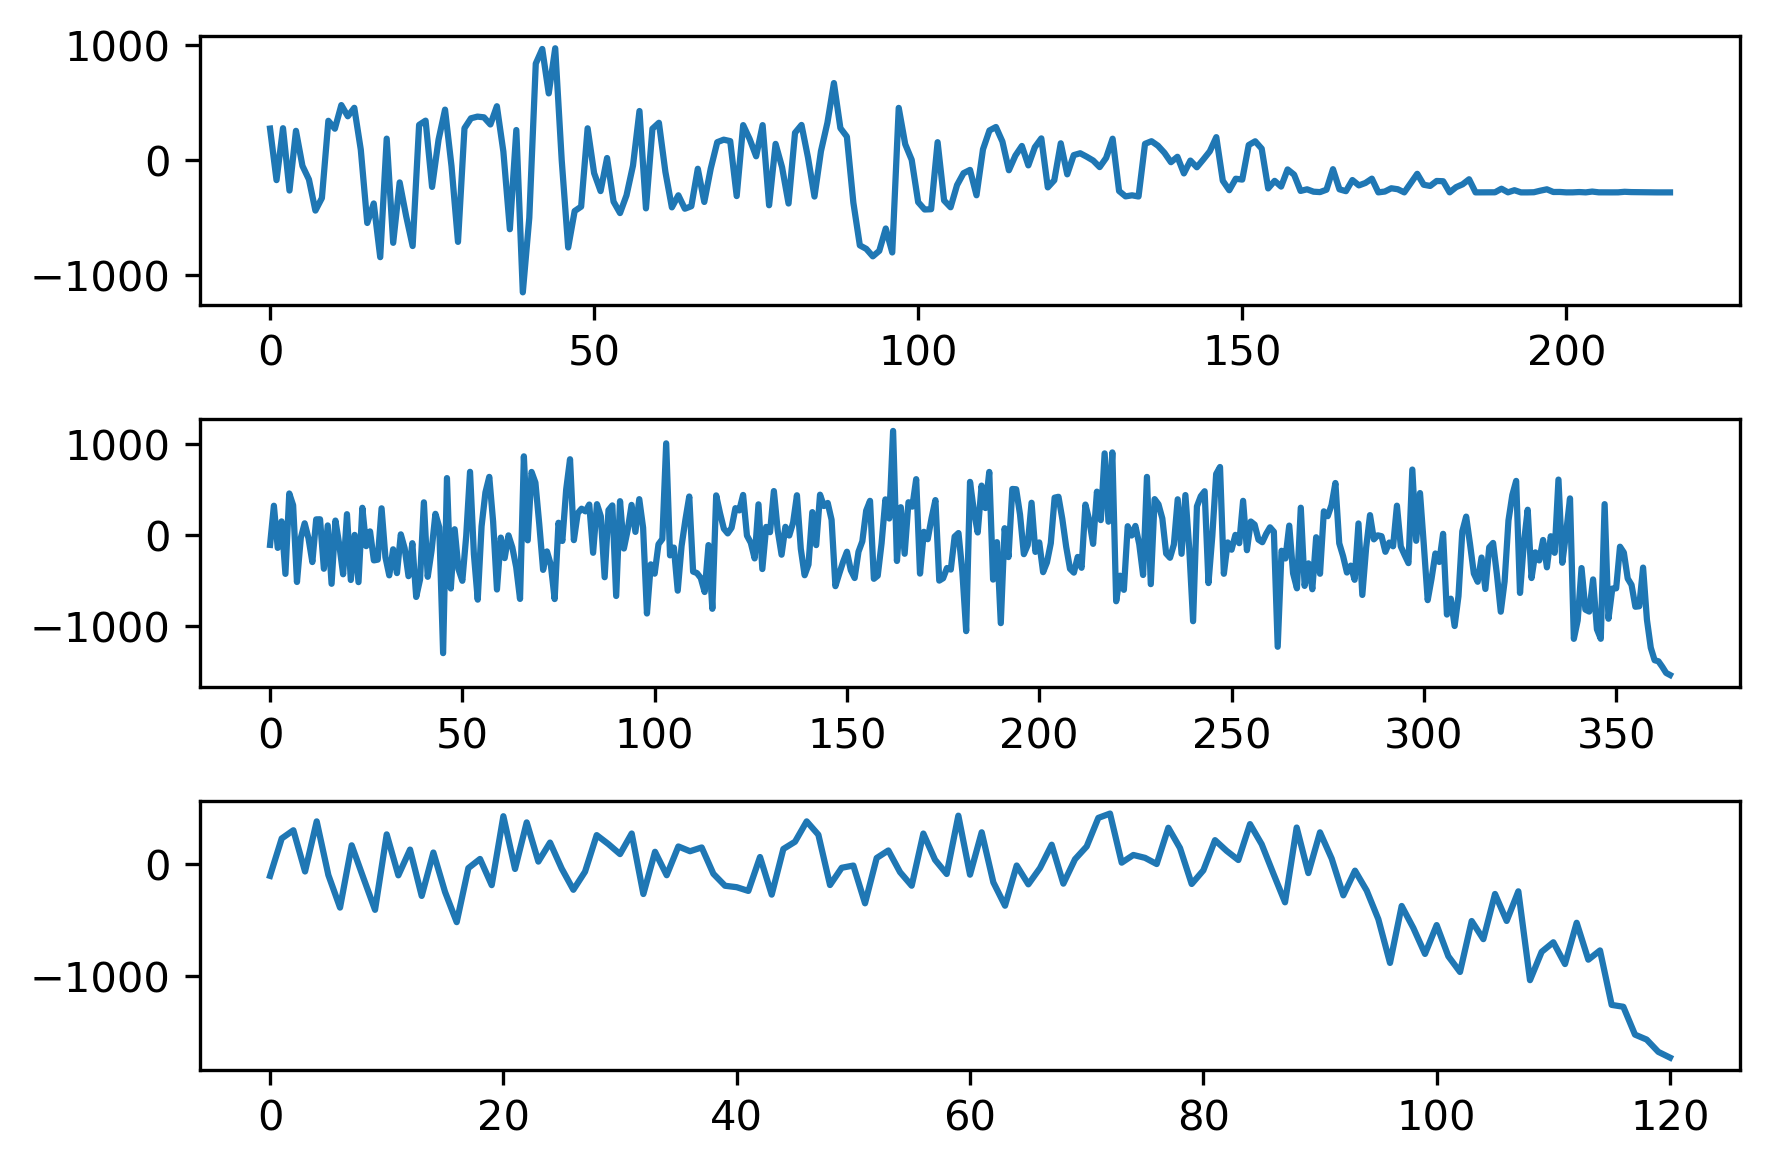

In [13]:
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.objective_history, label="chol")
axs[1].plot(rana_2d_diag.objective_history, label="diag")
axs[2].plot(rana_2d.objective_history, label="simple")
plt.tight_layout()

Text(0.5, 64.16666666666666, 'n_function_evaluations')

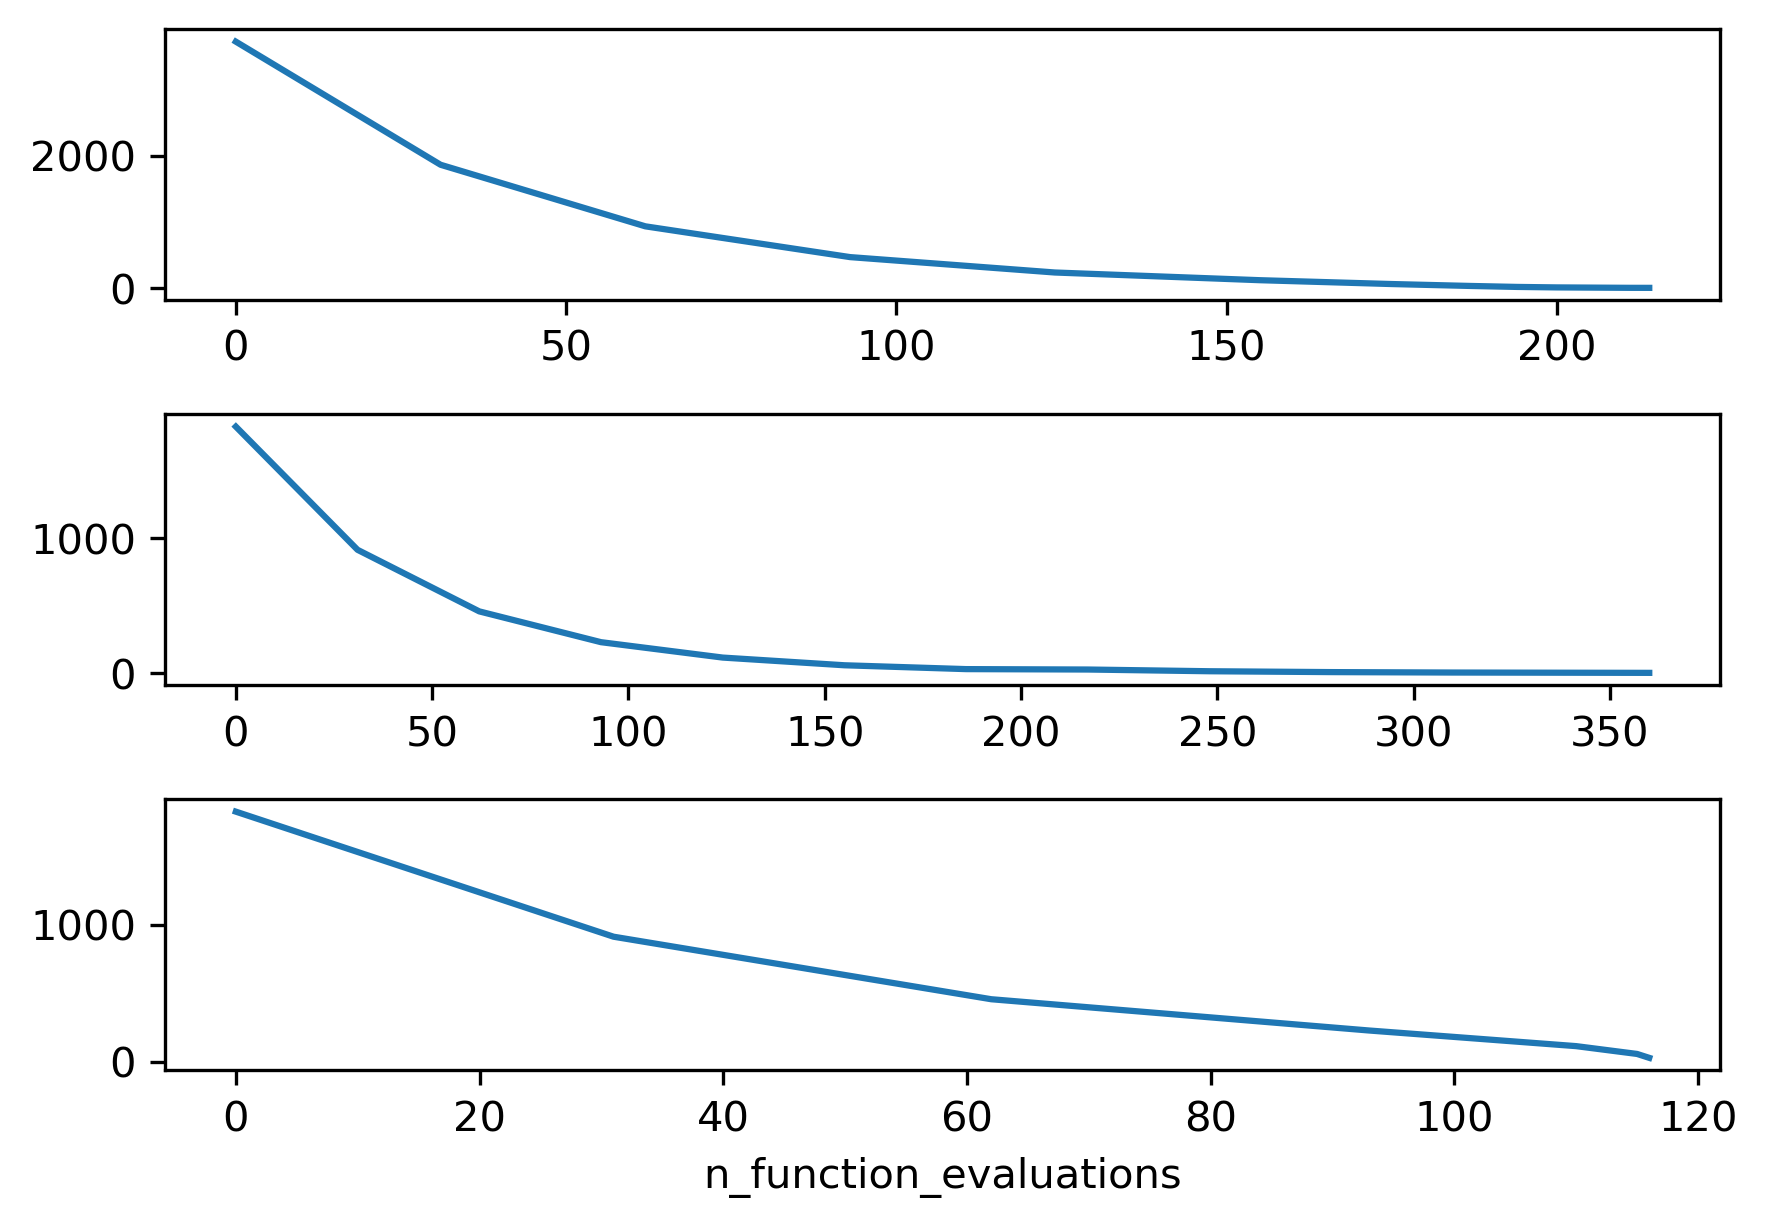

In [14]:
# temperature history
fig, axs = plt.subplots(3)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
axs[0].plot(temp_history_chol[:, 1], temp_history_chol[:, 0], label="chol")
temp_history_diag = np.array(rana_2d_diag.temperature_history)
axs[1].plot(temp_history_diag[:, 1], temp_history_diag[:, 0], label="diag")
temp_history = np.array(rana_2d.temperature_history)
axs[2].plot(temp_history[:, 1], temp_history[:, 0], label="simple")
plt.tight_layout()
axs[2].set_xlabel("n_function_evaluations")

(0.0, 1.0)

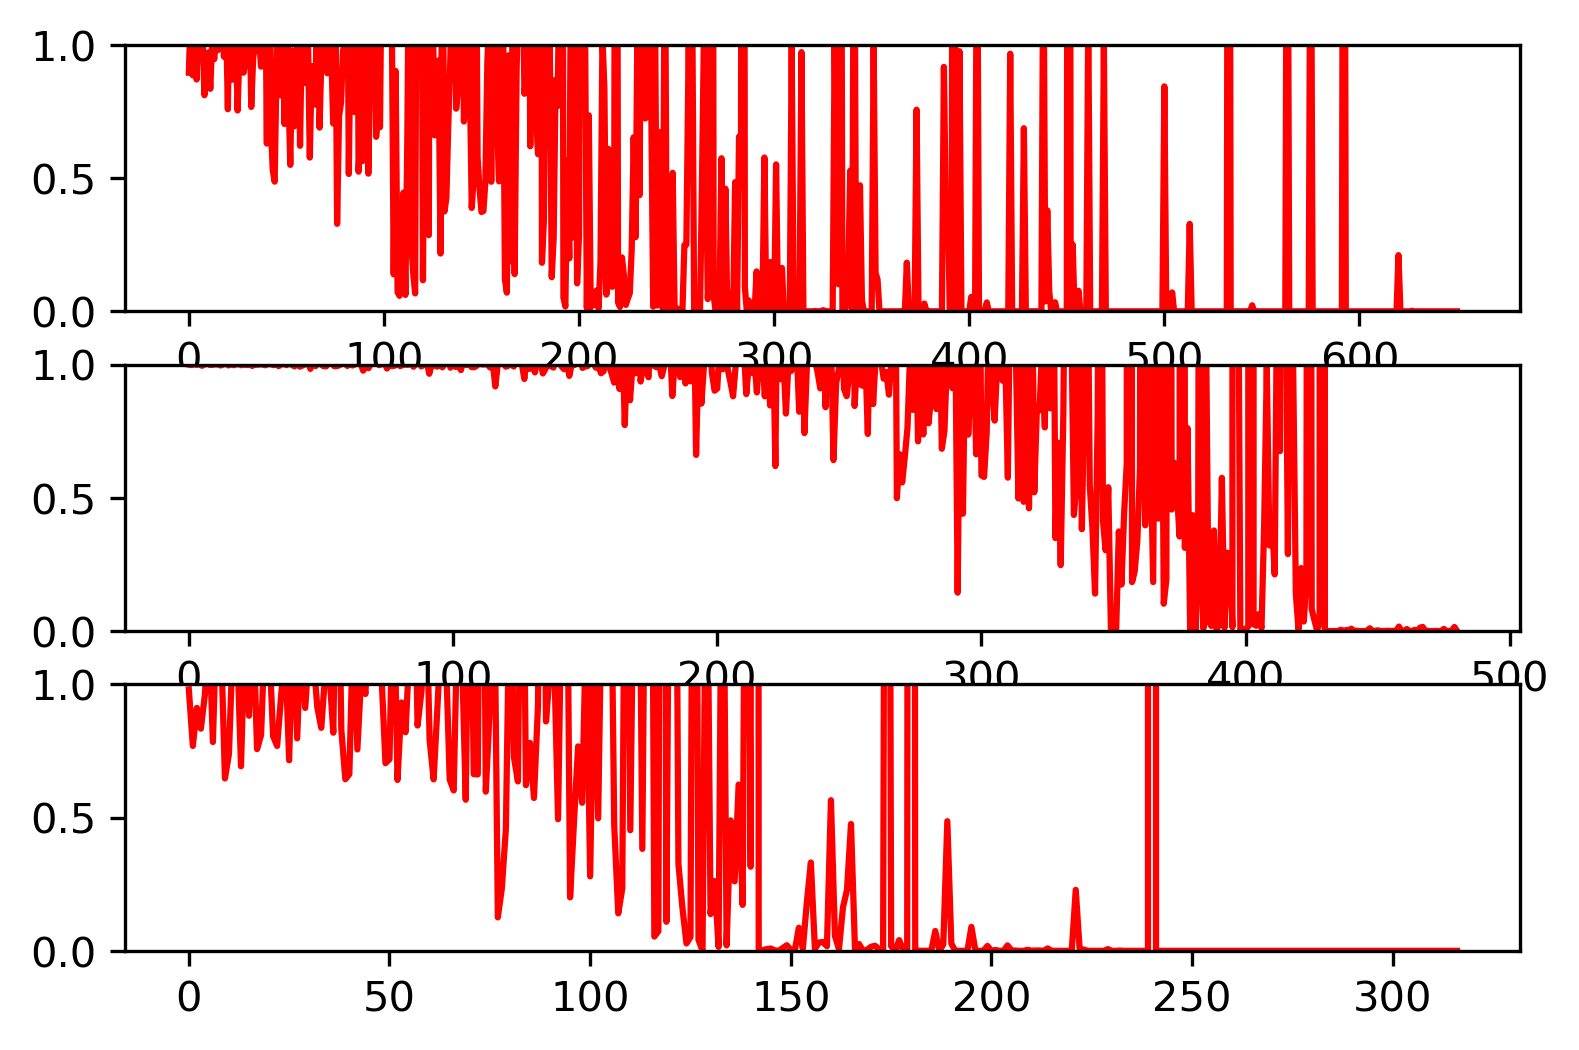

In [15]:
# probability of acceptence
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.probability_of_acceptance_history, "r", label="chol")
axs[0].set_ylim(0, 1)
axs[1].plot(rana_2d_diag.probability_of_acceptance_history, "r", label="diag")
axs[1].set_ylim(0, 1)
axs[2].plot(rana_2d.probability_of_acceptance_history, "r", label="simple")
axs[2].set_ylim(0, 1)

# old

In [ ]:
fig, ax = plt.subplots(1)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
ax.plot(temp_history_chol[:, 1], temp_history_chol[:, 0])

In [ ]:
plt.plot(rana_2d_chol.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d_chol.objective_history)

# Diag

In [ ]:
fig, ax = plt.subplots(1)
temp_history = np.array(rana_2d_diag.temperature_history)
ax.plot(temp_history[:, 1], temp_history[:, 0])

In [ ]:
plt.plot(rana_2d_diag.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d_diag.objective_history)

# Without any fancy step size stuff

In [ ]:
fig, ax = plt.subplots(1)
temp_history = np.array(rana_2d.temperature_history)
ax.plot(temp_history[:, 1], temp_history[:, 0])

In [ ]:
plt.plot(rana_2d.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d.objective_history)